# Lab 05

# Preprocessing

Text preprocessing is an important step for natural language processing (NLP) tasks. It transforms text into a more digestible form so that machine learning algorithms can perform better. It is important to understand what each preprocessing method does in order to help decide if it is appropriate for your particular task.

## Text Wrangling

Text wrangling is converting/gathering/extracting formatted text from raw data. 

For example, **HTML** does not include only text. Even when you extract only the text from **HTML**, it is not all meaningful (e.g. advertisements).

Have a look at the [news article](https://www.smh.com.au/national/nsw/macquarie-uni-suspends-teaching-for-10-days-to-move-learning-online-20200317-p54avs.html). We might be only interested in getting the headline and body of the article.

The following code removes some irrelevant tags (i.e. script, style, link, etc.) and displays the remaining tags. We will mainly utilize two packages: 


*   `urllib`: is a package that collects several modules for working with URLs. We will use `urllib.request` for opening and reading URLs (See details at [urllib.request](https://docs.python.org/3/library/urllib.request.html#module-urllib.request)). 
*   `BeautifulSoup`: Beautiful Soup is a library that makes it easy to scrape information from web pages. It sits atop an HTML or XML parser, providing Pythonic idioms for iterating, searching, and modifying the parse tree (See details at [BeautifulSoup](https://pypi.org/project/beautifulsoup4/)).


    


In [1]:
import urllib 
from bs4 import BeautifulSoup

url = "https://www.smh.com.au/national/nsw/macquarie-uni-suspends-teaching-for-10-days-to-move-learning-online-20200317-p54avs.html"
html = urllib.request.urlopen(url).read()
soup = BeautifulSoup(html)

# remove irrelevant tags (script, style, link, etc.)
for script in soup(["script", "style", "link", "head", "noscript"]):
    script.extract()    # rip it out, i.e remove the tag from the tree

# The get_text() returns all the human-readable text beneath the tag as string
text = soup.get_text()
#print(text) # you can uncomment to have a look the returned text

# The prettify() method will turn a Beautiful Soup parse tree into a nicely formatted Unicode string, with a separate line for each tag and each string
print(soup.prettify())

<!DOCTYPE html>
<html lang="en">
 <body>
  <div id="app">
   <div aria-atomic="true" aria-live="off" class="_2O3rv" id="page_announcer" tabindex="-1">
    University of Sydney to move fully online while Macquarie cancels classes
   </div>
   <div>
   </div>
   <div class="_2IxwW" role="">
    <svg aria-hidden="true" class="QMY9O _13Ea4" focusable="false" height="1em" width="1em">
     <use xlink:href="#icon-exclamation">
     </use>
    </svg>
    <p>
     We’re sorry, this service is currently unavailable. Please try again later.
    </p>
    <button class="YSssh">
     Dismiss
    </button>
   </div>
   <nav class="RbLp5">
    <a href="#sections">
     Skip to sections navigation
    </a>
    <a href="#content">
     Skip to content
    </a>
    <a href="#footer">
     Skip to footer
    </a>
   </nav>
   <header class="_21UZG noPrint">
    <div class="_2L98J">
     <ul>
      <li class="PJUwX">
       <button aria-controls="navigation" aria-expanded="false" class="_1k8VI">
        O

**Try &lt;p&gt;  tag**

Using &lt;p&gt;  tag is a common way to extract the main contents of the online news articles. BUT, do not expect this always provides what you want.

In [2]:
# The findAll() method returns all the specified tags, it is the same as find_all()
# Set text=True will return only the specified tags with the text inside, you can try to set text=False to compare the difference
p_tags = soup.findAll('p', text=True) 
for i, p_tag in enumerate(p_tags): 
    print(str(i) + str(p_tag))

0<p>We’re sorry, this service is currently unavailable. Please try again later.</p>
1<p>The University of Sydney will suspend all face-to-face teaching from Monday and move fully online while Macquarie University has cancelled classes altogether in order to make the digital transition, revealing one of its students tested positive for COVID-19.</p>
2<p>The University of Sydney's 10,000 staff members have been encouraged to work remotely to slow the spread of coronavirus, but the campus Wi-Fi network and facilities will remain open with enhanced cleaning protocols and social distancing measures.</p>
3<p>Courses with labs and practical components will be adapted for online or suspended until later in the semester while clinical placements for health students will go ahead under strict guidelines, Vice-Chancellor Michael Spence wrote to staff on Tuesday afternoon.</p>
4<p>"We’ve put a lot of effort and thought into how to do it. I think this is a tremendous opportunity. This could be an i

## Punctuation removal

First, let's try to remove punctuation by using an exhaustive list of symbols! 

In [3]:
puncts = [',', '.', '"', ':', ')', '(', '-', '!', '?', '|', ';', "'", '$', '&', '/', '[', ']', '>', '%', '=', '#', '*', '+', '\\', '•',  '~', '@', '£', 
 '·', '_', '{', '}', '©', '^', '®', '`',  '<', '→', '°', '€', '™', '›',  '♥', '←', '×', '§', '″', '′', 'Â', '█', '½', 'à', '…', 
 '“', '★', '”', '–', '●', 'â', '►', '−', '¢', '²', '¬', '░', '¶', '↑', '±', '¿', '▾', '═', '¦', '║', '―', '¥', '▓', '—', '‹', '─', 
 '▒', '：', '¼', '⊕', '▼', '▪', '†', '■', '’', '▀', '¨', '▄', '♫', '☆', 'é', '¯', '♦', '¤', '▲', 'è', '¸', '¾', 'Ã', '⋅', '‘', '∞', 
 '∙', '）', '↓', '、', '│', '（', '»', '，', '♪', '╩', '╚', '³', '・', '╦', '╣', '╔', '╗', '▬', '❤', 'ï', 'Ø', '¹', '≤', '‡', '√', ]

def remove_punctuation(x):
    x = str(x)
    for punct in puncts:
        if punct in x:
            x = x.replace(punct, '')
    return x


text = "It's a nice day[]"
print(remove_punctuation(text))


Its a nice day


Alternatively, what about using regular expressions ([re package](https://docs.python.org/3/library/re.html))?

In [4]:
import re

def remove_punctuation_re(x):
    x = re.sub(r'[^\w\s]','',x)
    
    return x


text = "It's a nice day[]"

print(remove_punctuation_re(text))

Its a nice day


Ok. Then what about emoticons?      **:)** or **:D** or **:(**  Some tasks may want you to keep emoticons e.g. sentiment analysis on tweets.


In [5]:
#you can find the solution from the TweetTokenizer https://www.nltk.org/_modules/nltk/tokenize/casual.html#TweetTokenizer (search "EMOTICONS" in the page)
EMOTICONS = r"""
    (?:
      [<>]?
      [:;=8]                     # eyes
      [\-o\*\']?                 # optional nose
      [\)\]\(\[dDpP/\:\}\{@\|\\] # mouth
      |
      [\)\]\(\[dDpP/\:\}\{@\|\\] # mouth
      [\-o\*\']?                 # optional nose
      [:;=8]                     # eyes
      [<>]?
      |
      <3                         # heart
    )"""

Have a look at some contractions of words! Contractions include punctuation - how would you handle them?


In [6]:
# These are just common English contractions. There are many edge cases. i.e. University's working on it.
contraction_dict = {"ain't": "is not", "aren't": "are not","can't": "cannot", "'cause": "because", "could've": "could have", 
                    "couldn't": "could not", "didn't": "did not",  "doesn't": "does not", "don't": "do not", "hadn't": "had not", 
                    "hasn't": "has not", "haven't": "have not", "he'd": "he would","he'll": "he will", "he's": "he is", "how'd": "how did", 
                    "how'd'y": "how do you", "how'll": "how will", "how's": "how is",  "I'd": "I would", "I'd've": "I would have", 
                    "I'll": "I will", "I'll've": "I will have","I'm": "I am", "I've": "I have", "i'd": "i would", "i'd've": "i would have", 
                    "i'll": "i will",  "i'll've": "i will have","i'm": "i am", "i've": "i have", "isn't": "is not", "it'd": "it would", 
                    "it'd've": "it would have", "it'll": "it will", "it'll've": "it will have","it's": "it is", "let's": "let us", 
                    "ma'am": "madam", "mayn't": "may not", "might've": "might have","mightn't": "might not","mightn't've": "might not have", 
                    "must've": "must have", "mustn't": "must not", "mustn't've": "must not have", "needn't": "need not", "needn't've": "need not have",
                    "o'clock": "of the clock", "oughtn't": "ought not", "oughtn't've": "ought not have", "shan't": "shall not", "sha'n't": "shall not", 
                    "shan't've": "shall not have", "she'd": "she would", "she'd've": "she would have", "she'll": "she will", "she'll've": "she will have", 
                    "she's": "she is", "should've": "should have", "shouldn't": "should not", "shouldn't've": "should not have", "so've": "so have",
                    "so's": "so as", "this's": "this is","that'd": "that would", "that'd've": "that would have", "that's": "that is", "there'd": "there would", 
                    "there'd've": "there would have", "there's": "there is", "here's": "here is","they'd": "they would", "they'd've": "they would have", 
                    "they'll": "they will", "they'll've": "they will have", "they're": "they are", "they've": "they have", "to've": "to have", "wasn't": "was not", 
                    "we'd": "we would", "we'd've": "we would have", "we'll": "we will", "we'll've": "we will have", "we're": "we are", "we've": "we have", 
                    "weren't": "were not", "what'll": "what will", "what'll've": "what will have", "what're": "what are",  "what's": "what is", "what've": "what have", 
                    "when's": "when is", "when've": "when have", "where'd": "where did", "where's": "where is", "where've": "where have", "who'll": "who will", 
                    "who'll've": "who will have", "who's": "who is", "who've": "who have", "why's": "why is", "why've": "why have", "will've": "will have", 
                    "won't": "will not", "won't've": "will not have", "would've": "would have", "wouldn't": "would not", "wouldn't've": "would not have", 
                    "y'all": "you all", "y'all'd": "you all would","y'all'd've": "you all would have","y'all're": "you all are","y'all've": "you all have",
                    "you'd": "you would", "you'd've": "you would have", "you'll": "you will", "you'll've": "you will have", "you're": "you are", "you've": "you have"}

## Stopwords removal
Stopwords are the most common words in any natural language. For the purpose of analyzing text data and building NLP models, these stopwords might not add much value to the meaning of the document. Generally, the most common words used in a text are “the”, “is”, “in”, “for”, “where”, “when”, “to”, “at” etc.



In [7]:
# You must be familiar with it already since we've tried this in Lab 1
import nltk
nltk.download('punkt')
nltk.download('stopwords')

from nltk.corpus import stopwords as sw
from nltk.tokenize import word_tokenize

my_sent = "Natural Language Processing is fun but challenging."
tokens = word_tokenize(my_sent)

stop_words = sw.words()
filtered_sentence = [w for w in tokens if not w in stop_words]

print(filtered_sentence)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
['Natural', 'Language', 'Processing', 'fun', 'challenging', '.']


## Case-folding
How would you handle case? A common strategy is to do case-folding by reducing all letters to lower case

In [8]:
text = "Hello there!"
#Returns the result of converting all characters in text to lowercase.
print(text.lower())


#do we need to reduce all letters to lower case?
text2 = "I love University of Sydney :D"
print(text2.lower())

hello there!
i love university of sydney :d


## Stemming
Stemming is a process of removing and replacing word suffixes to arrive at a common root form of the word.

*   Try various types of NLTK stemmer in [demo](http://text-processing.com/demo/stem/)
*   A comparative study of stemming algorithm: [Paper Link](https://pdfs.semanticscholar.org/1c0c/0fa35d4ff8a2f925eb955e48d655494bd167.pdf)


In [9]:
#let's try to test with porter algorithm
from nltk.stem.porter import *
stemmer = PorterStemmer()

plurals = ['caresses', 'flies', 'dies', 'mules', 'denied',
            'died', 'agreed', 'owned', 'humbled', 'sized',
            'meeting', 'stating', 'siezing', 'itemization',
            'sensational', 'traditional', 'reference', 'colonizer',
            'plotted']
singles = [stemmer.stem(plural) for plural in plurals]

print(singles)

['caress', 'fli', 'die', 'mule', 'deni', 'die', 'agre', 'own', 'humbl', 'size', 'meet', 'state', 'siez', 'item', 'sensat', 'tradit', 'refer', 'colon', 'plot']


## Lemmatisation

Lemmatisation is the process of grouping together the inflected forms of a word so they can be analysed as a single item, identified by the word's lemma, or dictionary form


In [10]:
#by NLTK Wordnet
nltk.download('wordnet')

from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()

print(lemmatizer.lemmatize("cats"))
print(lemmatizer.lemmatize("cacti"))
print(lemmatizer.lemmatize("geese"))
print(lemmatizer.lemmatize("rocks"))
print(lemmatizer.lemmatize("python"))
print(lemmatizer.lemmatize("better", pos="a"))
print(lemmatizer.lemmatize("best", pos="a"))
print(lemmatizer.lemmatize("run"))
print(lemmatizer.lemmatize("run",'v'))

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
cat
cactus
goose
rock
python
good
best
run
run


## Tokenisation

Given a character sequence and a defined document unit (word, sentence etc.), tokenisation is the task of chopping it up into pieces, called tokens, perhaps at the same time throwing away certain characters, such as punctuation

Try various types of NLTK Tokenizer in [demo](http://text-processing.com/demo/tokenize/). 

[NLTK Tokeniser API Doc](https://www.nltk.org/api/nltk.tokenize.html)

**TweetTokenizer: Twitter-aware tokeniser**

In [11]:
from nltk.tokenize import TweetTokenizer
tknzr = TweetTokenizer()

s0 = "I am so happy :) ;)" 

print(tknzr.tokenize(s0))

s0 = "I am so sad :("

print(tknzr.tokenize(s0))

['I', 'am', 'so', 'happy', ':)', ';)']
['I', 'am', 'so', 'sad', ':(']


**TreebankWordTokenizer**

The Treebank tokenizer uses regular expressions to tokenize text as in Penn Treebank.

In [12]:
from nltk.tokenize import TreebankWordTokenizer
tknzr = TreebankWordTokenizer()

s0 = "I am so happy :) ;)" 

print(tknzr.tokenize(s0))

s0 = "I am so sad :("

print(tknzr.tokenize(s0))

['I', 'am', 'so', 'happy', ':', ')', ';', ')']
['I', 'am', 'so', 'sad', ':', '(']


# Word Cloud
*   [Word Cloud](https://amueller.github.io/word_cloud/index.html)
*   [Wikipedia Python](https://pypi.org/project/wikipedia/)


In [13]:
!pip install wikipedia

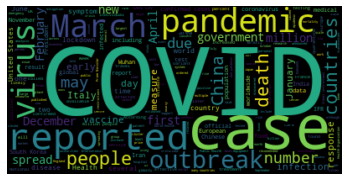

In [14]:
from wordcloud import WordCloud
import wikipedia

# Getting wikipedia contents of "COVID-19_pandemic"
text = wikipedia.page("COVID-19_pandemic").content

# Generate a word cloud image
wordcloud = WordCloud().generate(text)

# Display the generated image:
# the matplotlib way:
import matplotlib.pyplot as plt

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

Try more word cloud examples: [Link](https://amueller.github.io/word_cloud/auto_examples/index.html)

# Saving and Loading Models

**Saving model**

In [15]:
# Let's train a model first
import torch
import torch.nn.functional as F
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt

class TheModelClass(nn.Module):
    def __init__(self):
        super(TheModelClass, self).__init__()
        self.linear = nn.Linear(1, 1)

    def forward(self, input):
        output = self.linear(input)
        return output

no_of_epochs = 500
display_interval = 20
learning_rate=0.01

# training data
x_training = np.asarray([[1],[2],[5],[8],[9],[12],[14],[16],[18],[20]])
y_training = np.asarray([100,200,501,780,901,1201,1399,1598,1800,2000])

x_data_torch = torch.from_numpy(x_training).float()
y_data_torch = torch.from_numpy(y_training).float() 

model = TheModelClass()
optimizer = optim.SGD(model.parameters(), lr=learning_rate)

for epoch in range(no_of_epochs):

    # zero the parameter gradients
    optimizer.zero_grad()

    # forward + backward + optimize
    outputs = model(x_data_torch)
    loss = torch.sum(torch.pow(outputs-y_data_torch.view(-1,1),2))/(2*x_training.shape[0])
    loss.backward()
    optimizer.step()

    if epoch%display_interval == display_interval-1:
        print('Epoch: %d, loss: %.3f' %(epoch + 1, loss.item() ))

Epoch: 20, loss: 32.166
Epoch: 40, loss: 30.787
Epoch: 60, loss: 29.545
Epoch: 80, loss: 28.426
Epoch: 100, loss: 27.419
Epoch: 120, loss: 26.511
Epoch: 140, loss: 25.694
Epoch: 160, loss: 24.958
Epoch: 180, loss: 24.295
Epoch: 200, loss: 23.698
Epoch: 220, loss: 23.160
Epoch: 240, loss: 22.676
Epoch: 260, loss: 22.240
Epoch: 280, loss: 21.847
Epoch: 300, loss: 21.493
Epoch: 320, loss: 21.174
Epoch: 340, loss: 20.887
Epoch: 360, loss: 20.629
Epoch: 380, loss: 20.396
Epoch: 400, loss: 20.186
Epoch: 420, loss: 19.998
Epoch: 440, loss: 19.827
Epoch: 460, loss: 19.674
Epoch: 480, loss: 19.536
Epoch: 500, loss: 19.412


In [16]:
# Now we save the trained model to the file named 'filename.pt'
torch.save(model, 'filename.pt')

**Loading model**

In [17]:
# Please note that you have to run the code for defining the TheModelClass in the above section then you can load the model weights from the saved model file
the_saved_model = torch.load('filename.pt')
the_saved_model.eval()

TheModelClass(
  (linear): Linear(in_features=1, out_features=1, bias=True)
)

In [18]:
prediction = the_saved_model(x_data_torch).detach().numpy()
for i in range(len(y_training)):
    print('X: %d, Y_true: %d, Y_predict: %.3f'%(x_training[i][0],y_training[i],prediction[i][0]))

X: 1, Y_true: 100, Y_predict: 99.990
X: 2, Y_true: 200, Y_predict: 199.861
X: 5, Y_true: 501, Y_predict: 499.474
X: 8, Y_true: 780, Y_predict: 799.086
X: 9, Y_true: 901, Y_predict: 898.957
X: 12, Y_true: 1201, Y_predict: 1198.570
X: 14, Y_true: 1399, Y_predict: 1398.311
X: 16, Y_true: 1598, Y_predict: 1598.053
X: 18, Y_true: 1800, Y_predict: 1797.795
X: 20, Y_true: 2000, Y_predict: 1997.536


**How to Save (Upload) the model to your Google Drive**

There are various ways to upload the files on Google Drive.

[This tutorial](https://colab.research.google.com/notebooks/io.ipynb#scrollTo=RWSJpsyKqHjH) will guide you how to save the files on your Google Drive.

1.   Mounting Google Drive locally
2.   Create a new Drive file


# Bi-LSTM with Hidden State Extraction

The folllowing image represents a Bi-LSTM for an N to 1 task. In an N to 1 task, it is usually required to extract the last hidden states of forward lstm and backward lstm and combine (concat) them. (Please check the lecture 5 recording, please!)

Bi-LSTM: Bidirectional LSTM, which means the signal propagates backward as well as forward in time.

![alt text](https://usydnlpgroup.files.wordpress.com/2020/03/bi-lstm_nto1-e1585416735686.png)

## nn.Embedding
In lab4 E2, we provide the embeddings for each token in each sentence. These are constructed by the pre-trained word embedding model. For example, if the sequence length of the corpus is 8 (think about why we want a uniform sequence length for the whole dataset), the embedding for the sentence "i am crazy in love" should be $[W_{i}, W_{am}, W_{crazy}，W_{in}, W_{love}, W_{[PAD]}, W_{[PAD]}, W_{[PAD]}]$(if you choose post-padding) or $[W_{[PAD]}, W_{[PAD]},W_{[PAD]}, W_{i}, W_{am}, W_{crazy}，W_{in}, W_{love}]$(if you choose pre-padding).

Therefore, after getting the embedding of each sentence, you will get a tensor with the shape of (train_size, seq_length, emb_dimension). However, if these three values (train_size, seq_length, emb_dimension) are large enough, you might get Out-Of-Memory(OOM) problem due to limited CPU/GPU.

One solution is using **nn.Embedding** as a lookup table to get the embedding for each token/word during the training process instead of generating them all beforehand. (You should have already seen it before in the lab4 E2 sample solution).


In [19]:
# Toy Data for sentiment analysis
sentences = [['i','like','that'],
             ['i','love','it'],
             ['i','hate','that'],
             ['i','do','not','like','it']]
labels = ["Positive","Positive","Negative","Negative"]

In [20]:
# Set is a hashtable in python
word_set = set() 
for sent in sentences:
    for word in sent:
        word_set.add(word)
# Sometimes you can use same token to present PAD and UNKOWN if you just want to set them as all zeros
word_set.add('[PAD]')
word_set.add('[UNKNOWN]')

word_list = list(word_set) 
# Although in some python versions, converting a set to list will return a ordered result, 
# It is still highly recommended that you sort this list to make sure the reproducibility of your code
word_list.sort()
print(word_list)

word_index = {}
ind = 0
for word in word_list:
    word_index[word] = ind
    ind += 1
print(word_index)

['[PAD]', '[UNKNOWN]', 'do', 'hate', 'i', 'it', 'like', 'love', 'not', 'that']
{'[PAD]': 0, '[UNKNOWN]': 1, 'do': 2, 'hate': 3, 'i': 4, 'it': 5, 'like': 6, 'love': 7, 'not': 8, 'that': 9}


In [21]:
# Convert the sentences to the word index
len_list = [len(s) for s in sentences]
seq_length = max(len_list)

def encode_and_add_padding(sentences, seq_length, word_index):
    sent_encoded = []
    for sent in sentences:
        temp_encoded = [word_index[word] for word in sent]
        if len(temp_encoded) < seq_length:
            temp_encoded += [word_index['[PAD]']] * (seq_length - len(temp_encoded))
        sent_encoded.append(temp_encoded)
    return sent_encoded

sent_encoded = encode_and_add_padding(sentences, seq_length, word_index)
print(sent_encoded)

[[4, 6, 9, 0, 0], [4, 7, 5, 0, 0], [4, 3, 9, 0, 0], [4, 2, 8, 6, 5]]


In [22]:
# Download Pre-trained Embedding
import gensim.downloader as api
word_emb_model = api.load("glove-twitter-25")

In [23]:
# Create the Embedding lookup table
import numpy as np
emb_dim = word_emb_model.vector_size

emb_table = []
for i, word in enumerate(word_list):
    if word in word_emb_model:
        emb_table.append(word_emb_model[word])
    else:
        emb_table.append([0]*emb_dim)
emb_table = np.array(emb_table)
    
print(emb_table)

[[ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00]
 [ 1.64769995e+00  1.29030004e-01  7.69110024e-01 -3.08539998e-02
   2.75059998e-01 -4.92980003e-01  8.20599973e-01 -1.25589997e-01
   5.70680022e-01 -7.98979998e-01 -1.6

In [24]:
# LabelEncoder can help us encode target labels with value between 0 and n_classes-1.
# Details can be found from: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html
from sklearn.preprocessing import LabelEncoder

lEnc = LabelEncoder()
lEnc.fit(labels)
label_encoded= lEnc.transform(labels)

print(label_encoded)
print(labels)

[1 1 0 0]
['Positive', 'Positive', 'Negative', 'Negative']


In [25]:
vocab_size = len(word_list)
unique_labels = np.unique(labels)
n_class = len(unique_labels)
n_hidden = 32
learning_rate = 0.01
total_epoch = 10

In [26]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from sklearn.metrics import accuracy_score

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

class Bi_LSTM_Emb(nn.Module):
    def __init__(self):
        super(Bi_LSTM_Emb, self).__init__()
        self.emb = nn.Embedding(vocab_size, emb_dim)
        # Initialize the Embedding layer with the lookup table we created 
        self.emb.weight.data.copy_(torch.from_numpy(emb_table))
        # Optional: set requires_grad = False to make this lookup table untrainable
        # self.emb.weight.requires_grad = False

        self.lstm = nn.LSTM(emb_dim, n_hidden, batch_first =True, bidirectional=True)
        self.linear = nn.Linear(n_hidden*2, n_class)

    def forward(self, x):
        # Get the embeded tensor
        x = self.emb(x)        
        # we will use the returned h_n of shape (num_layers * num_directions, batch, hidden_size): tensor containing the hidden state for t = seq_len.
        # details of the outputs from nn.LSTM can be found from: https://pytorch.org/docs/stable/generated/torch.nn.LSTM.html
        lstm_out, (h_n,c_n) = self.lstm(x)
        # concat the last hidden state from two direction
        hidden_out =torch.cat((h_n[0,:,:],h_n[1,:,:]),1)
        z = self.linear(hidden_out)
        return z

# Move the model to GPU
model = Bi_LSTM_Emb().to(device)
# Loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

# Preparing input
input_torch = torch.from_numpy(np.array(sent_encoded)).to(device)
targe_torch = torch.from_numpy(np.array(label_encoded)).view(-1).to(device)


for epoch in range(total_epoch):  
    
    # Set the flag to training
    model.train()
    
    # forward + backward + optimize
    optimizer.zero_grad()
    outputs = model(input_torch) 
    loss = criterion(outputs, targe_torch)
    loss.backward()
    optimizer.step()
    
    predicted = torch.argmax(outputs, -1)
    acc= accuracy_score(predicted.cpu().numpy(),targe_torch.cpu().numpy())

    print('Epoch: %d, loss: %.5f, train_acc: %.2f' %(epoch + 1, loss.item(), acc))

print('Finished Training')




Epoch: 1, loss: 0.69548, train_acc: 0.50
Epoch: 2, loss: 0.62066, train_acc: 0.75
Epoch: 3, loss: 0.55080, train_acc: 0.75
Epoch: 4, loss: 0.47745, train_acc: 0.75
Epoch: 5, loss: 0.39895, train_acc: 0.75
Epoch: 6, loss: 0.31585, train_acc: 1.00
Epoch: 7, loss: 0.23069, train_acc: 1.00
Epoch: 8, loss: 0.14835, train_acc: 1.00
Epoch: 9, loss: 0.08014, train_acc: 1.00
Epoch: 10, loss: 0.03747, train_acc: 1.00
Finished Training


In [27]:
# You can check whether model.emb.weight changed
# You can also try to comment self.emb.weight.requires_grad = False and then train the model and check again
print(model.emb.weight)

Parameter containing:
tensor([[-2.2890e-03, -8.4043e-02, -8.6589e-02, -3.6060e-02, -7.3638e-02,
         -3.3174e-02, -7.8907e-02,  2.3799e-02,  7.7564e-02, -8.2469e-02,
          8.7146e-02, -7.0297e-02,  4.4890e-02,  7.2598e-02, -5.2777e-02,
         -1.6596e-02,  9.2562e-02, -7.5815e-02,  5.0648e-02,  4.9406e-02,
         -1.1305e-02, -8.4661e-02, -7.8074e-02, -7.1980e-02,  1.7167e-02],
        [ 0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,
          0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,
          0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,
          0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,
          0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00],
        [ 1.7037e+00,  2.1458e-01,  8.5135e-01, -1.1940e-01,  3.5287e-01,
         -4.1929e-01,  8.8718e-01, -1.7753e-01,  6.5412e-01, -7.1046e-01,
         -1.7793e+00, -1.8246e+00, -5.2556e+00, -1.3392e+00, -6.8427e-01,
         -8.34

# Exercise

## E1. Briefly describe the difference between Stemming and Lemmatisation.
Please write down your answer below in your own words with **examples**

Your answer:
Stemming and Lemmatisation are both forms of Text Processing. 

Stemming crudely removes the stem of words, also known as affixes, to reach a common root amongst words. However, this often leads to incorrect spelling of words and meanings. For example, the sentence “NLP tasks needs to do text pre-processing” will be reduced to “NLP task need to do text pre-process”. 

Lemmatisation takes into account of the context the word is in and converts the word to a meaningful base form. However, it needs to find the correct headword from a specified word dictionary. Whereas, stemming does not require external libraries as it only removes affixes in place. For example, under lemmatisation the words teaching, teaches, teacher and teachable will be converted to the base form teach.

## E2. Preprocessing and Model Saving
In this exercise, you are to preprocess the train and test data, and apply different pre-trained embeddings.

**Note**: We won't mark your exercise based on the test set performance, we will only check whether the preprocessing part and embedding part are correct.



In [28]:
import torch
#You can enable GPU here (cuda); or just CPU
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

### Download Dataset

In [29]:
# Code to download file into Colaboratory:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

id = '1gNfBqguzBu8cHKMPc8C44GbvD443dNC5'
downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile('twitter.csv')  

import pandas as pd
df = pd.read_csv("twitter.csv")
df_pick = df.sample(400,random_state=24)

raw_text = df_pick["Text"].tolist()
raw_label = df_pick["Label"].tolist()

from sklearn.model_selection import train_test_split
text_train,text_test,label_train,label_test = train_test_split(raw_text,raw_label,test_size=0.25,random_state=42)

### Preprocessing [Complete this section]

**Case Folding**

In [30]:
text_train1 = text_train.copy()
text_train = [s.lower() for s in text_train]
text_test = [s.lower() for s in text_test]

**Remove punctuations [Please complete this section]**

In [31]:
import re
def remove_punctuation_re(x):
    x = re.sub(r'[^\w\s]','',x)
    return x
    
text_train = [remove_punctuation_re(s) for s in text_train]
text_test = [remove_punctuation_re(s) for s in text_test]
# print(text_train[1])
# print(text_train1[1])

**Tokenization [Please complete this section]**

In [32]:
import nltk
nltk.download('punkt')

from nltk.tokenize import word_tokenize
from nltk.tokenize import TreebankWordTokenizer
tknzr = TreebankWordTokenizer()
#Please complete this
text_train = [word_tokenize(x) for x in text_train]
text_test = [word_tokenize(x) for x in text_test]
# print(text_train[1])

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


**Remove stopwords [Please complete this section]**

In [33]:
nltk.download('stopwords')
from nltk.corpus import stopwords as sw
stop_words = sw.words()

text_train_ns=[]
for tokens in text_train:
    filtered_sentence = [w for w in tokens if not w in stop_words]
    text_train_ns.append(filtered_sentence)

text_test_ns=[]
for tokens in text_test:
    filtered_sentence = [w for w in tokens if not w in stop_words]
    text_test_ns.append(filtered_sentence)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


**Lemmatisation [Please complete this section]**

In [34]:
nltk.download('wordnet')

from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()

text_train_le = []
for tokens in text_train_ns:
    lemma_sentence = [lemmatizer.lemmatize(w) for w in tokens ]
    text_train_le.append(lemma_sentence)

text_test_le = []
for tokens in text_test_ns:
    lemma_sentence = [lemmatizer.lemmatize(w) for w in tokens ]
    text_test_le.append(lemma_sentence)


[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


**Label Encoding [Please complete this section]**

In [35]:
import numpy as np

from sklearn.preprocessing import LabelEncoder

unique_labels = np.unique(label_train)

lEnc = LabelEncoder()
# Please encode the labels (Do NOT add new lines of code in this section)
# Hint: Try to understand the difference between fit_transform and transform
label_train_encoded = lEnc.fit_transform(label_train)
label_test_encoded = lEnc.transform(label_test)

n_class = len(unique_labels)
print(unique_labels)
print(lEnc.transform(unique_labels))

# print(label_train[:10])
# print(label_train_encoded[:10])
# print(label_test[:10])
# print(label_test_encoded[:10])

['none' 'racism' 'sexism']
[0 1 2]


Sample output for Label Encoding (Only for format reference)

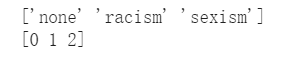

### Embeddings [Complete this section]

**Get Word List**

In [36]:
word_set = set() 
for sent in text_train_le:
    for word in sent:
        word_set.add(word)
word_set.add('[PAD]')
word_set.add('[UNKNOWN]')

word_list = list(word_set) 
word_list.sort()
print(word_list)

word_index = {}
ind = 0
for word in word_list:
    word_index[word] = ind
    ind += 1
print(word_index)

['0', '06jank', '0xjared', '1', '11', '12', '14', '1400', '15', '17', '1shadeofritch', '2', '2027279099', '22000', '2ndbestidiot', '3', '3outof10', '4', '44', '47', '4x', '5', '6', '7', '80', '800', '90', '911', '98halima', '99', '[PAD]', '[UNKNOWN]', '__chris33__', '_marisajane', 'abducted', 'abdul_a95', 'aberration', 'ability', 'ablahad', 'able', 'absolutely', 'abuse', 'ac360', 'accept', 'acceptable', 'accepted', 'accessorizing', 'account', 'achieve', 'across', 'actoractress', 'actually', 'adjective', 'admits', 'adult', 'afar', 'afraid', 'ago', 'agree', 'ahahahaha', 'air', 'airstrikes', 'aisle', 'ajwatamr', 'akheemv', 'aledthomas22', 'alihadi68', 'alihashem_tv', 'alive', 'all_hailcaesar', 'allegedly', 'allstatejackie', 'ally', 'along', 'already', 'alternet', 'amaze', 'amazing', 'amazingly', 'amberhasalamb', 'ameliagreenhall', 'american', 'amohedin', 'amp', 'amymek', 'anasmechch', 'andcamping', 'andre', 'angelemichelle', 'anitaingle', 'annoying', 'another', 'answer', 'anti', 'antihara

Sample output for Get Word List (Only for format reference since the following pic is not a full print result. But the format is clear to see.)

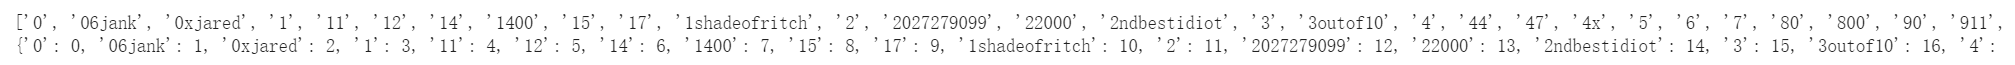

**padding and encoding [Please complete this section]**

In [37]:
# The sequence length is pre-defined, you can't change this value for this exercise
seq_length = 16

# Please Complete this function
# Hint: You should pay attention to: (1) if the sentence length > seq_length (2) if the word not in word_index dictionary
def encode_and_add_padding(sentences, seq_length, word_index):
    sent_encoded = []
    for sent in sentences:
      temp_encoded = []
      for word in sent:
        # implement a try catch to encode words not in word_index dictionary
        try:
          temp_encoded.append(word_index[word])
        except:
          # catch if word not in word_index dictionary
          temp_encoded.append(word_index['[UNKNOWN]'])
      # if sentence length < seq_length
      if len(temp_encoded) < seq_length:
        temp_encoded += [word_index['[PAD]']] * (seq_length - len(temp_encoded))
      else:
        # if sentence length > seq_length then just append up to the sequence
        sent_encoded.append(temp_encoded[:seq_length])
        continue
      sent_encoded.append(temp_encoded)
    return sent_encoded

train_pad_encoded = encode_and_add_padding(text_train_le, seq_length, word_index )
test_pad_encoded = encode_and_add_padding(text_test_le, seq_length, word_index )

# print(text_train_le[2])
# train_pad_encoded[2]


**Download Embeddings [Please complete this section]**

You can find the details from https://github.com/RaRe-Technologies/gensim-data

In [38]:
import gensim.downloader as api
# glove-twitter-50
# fasttext-wiki-news-subwords-300
word_emb_model = api.load("glove-wiki-gigaword-100") # Download an embedding other than glove-twitter-25

[==================================================] 100.0% 128.1/128.1MB downloaded


**Get embeddings**

In [39]:
# Get the Embedding lookup table
import numpy as np
emb_dim = word_emb_model.vector_size

emb_table = []
for i, word in enumerate(word_list):
    if word in word_emb_model:
        emb_table.append(word_emb_model[word])
    else:
        emb_table.append([0]*emb_dim)
emb_table = np.array(emb_table)

### Model

In [40]:
vocab_size = len(word_list)
n_hidden = 50
total_epoch = 100
learning_rate = 0.01

In [41]:
import torch
#You can enable GPU here (cuda); or just CPU
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

import numpy as np

import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from sklearn.metrics import accuracy_score

class Model(nn.Module):
    def __init__(self):
        super(Model, self).__init__()
        self.emb = nn.Embedding(vocab_size, emb_dim)
        self.emb.weight.data.copy_(torch.from_numpy(emb_table))
        self.emb.weight.requires_grad = False
        self.lstm = nn.LSTM(emb_dim, n_hidden, num_layers=2, batch_first =True, dropout=0.2)
        self.linear = nn.Linear(n_hidden,n_class)

    def forward(self, x):
        x = self.emb(x)
        x,_ = self.lstm(x)
        x = self.linear(x[:,-1,:])
        return x


model = Model().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

input_torch = torch.from_numpy(np.array(train_pad_encoded)).to(device)
target_torch = torch.from_numpy(np.array(label_train_encoded)).view(-1).to(device)


for epoch in range(total_epoch):  
    
    model.train()
    optimizer.zero_grad()
    outputs = model(input_torch) 
    loss = criterion(outputs, target_torch)
    loss.backward()
    optimizer.step()
    
    if epoch%10 == 9:
        predicted = torch.argmax(outputs, -1)
        acc= accuracy_score(predicted.cpu().numpy(),target_torch.cpu().numpy())

        print('Epoch: %d, loss: %.5f, train_acc: %.2f' %(epoch + 1, loss.item(), acc))

print('Finished Training')


Epoch: 10, loss: 0.74109, train_acc: 0.68
Epoch: 20, loss: 0.60283, train_acc: 0.73
Epoch: 30, loss: 0.54278, train_acc: 0.76
Epoch: 40, loss: 0.49668, train_acc: 0.76
Epoch: 50, loss: 0.28611, train_acc: 0.92
Epoch: 60, loss: 0.17890, train_acc: 0.96
Epoch: 70, loss: 0.16447, train_acc: 0.96
Epoch: 80, loss: 0.15346, train_acc: 0.96
Epoch: 90, loss: 0.18839, train_acc: 0.95
Epoch: 100, loss: 0.16475, train_acc: 0.96
Finished Training


Sample output for model training (Only for format reference)

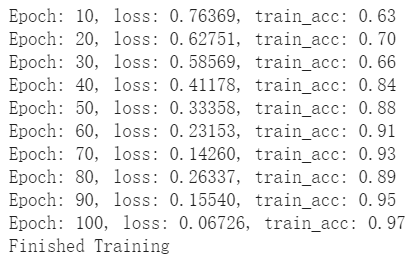

### Save and Load the model [Complete this section]

**Save the model [Complete this part]**

In [42]:
torch.save(model, 'lab5.pt')

**Load the model**

In [43]:
model2 = torch.load('lab5.pt')
model2.eval()

Model(
  (emb): Embedding(1640, 100)
  (lstm): LSTM(100, 50, num_layers=2, batch_first=True, dropout=0.2)
  (linear): Linear(in_features=50, out_features=3, bias=True)
)

### Testing

In [44]:
input_torch = torch.from_numpy(np.array(test_pad_encoded)).to(device)

outputs = model2(input_torch) 
predicted = torch.argmax(outputs, -1)

from sklearn.metrics import classification_report
print(classification_report(label_test_encoded,predicted.cpu().numpy()))

              precision    recall  f1-score   support

           0       0.79      0.77      0.78        65
           1       0.70      0.70      0.70        10
           2       0.48      0.52      0.50        25

    accuracy                           0.70       100
   macro avg       0.66      0.66      0.66       100
weighted avg       0.71      0.70      0.70       100



Sample output for Testing (Only for format reference)

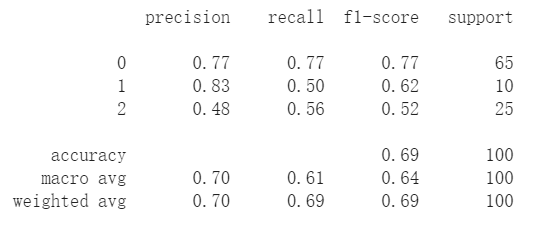